# Predicting the Rings (Age) of abalone
# Final Project for MATH 156
# Wesley Bian

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Exploratory Data Analysis

In [2]:
df = pd.read_csv("abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
print("Rows: " + str(df.shape[0]))
print("Colums: " + str(df.shape[1]))

Rows: 4177
Colums: 9


In [4]:
print("unique ring values:", len(df.value_counts("Rings").index))
print("Highest number of rings:", max(df["Rings"]))

unique ring values: 28
Highest number of rings: 29


28 different abalone Ring values are represented in the dataset. The largest one is 29.

In [5]:
round(df.describe(), 2)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00,4177.00
mean,0.52,0.41,0.14,0.83,0.36,0.18,0.24,9.93
std,0.12,0.10,0.04,0.49,0.22,0.11,0.14,3.22
min,0.08,0.06,0.00,0.00,0.00,0.00,0.00,1.00
25%,0.45,0.35,0.12,0.44,0.19,0.09,0.13,8.00
50%,0.55,0.42,0.14,0.80,0.34,0.17,0.23,9.00
75%,0.62,0.48,0.16,1.15,0.50,0.25,0.33,11.00
max,0.82,0.65,1.13,2.83,1.49,0.76,1.00,29.00


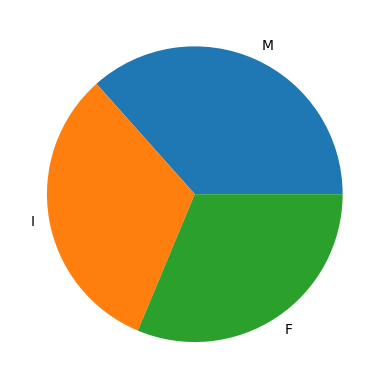

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,,,,,,,,
F,0.58,0.45,0.16,1.05,0.45,0.23,0.30,11.13
I,0.43,0.33,0.11,0.43,0.19,0.09,0.13,7.89
M,0.56,0.44,0.15,0.99,0.43,0.22,0.28,10.71


In [6]:
gender_nums = df["Sex"].value_counts()
labels = gender_nums.index
values = gender_nums.values
plt.pie(values, labels = labels)
plt.show()

round(df.groupby("Sex").mean(), 2)

Data is evenly distributed between M = Male, F = Female, I = Infant. Generally, it seems that all measurements are on average lowest for Infant, in the middle for Male, and highest for Female. 

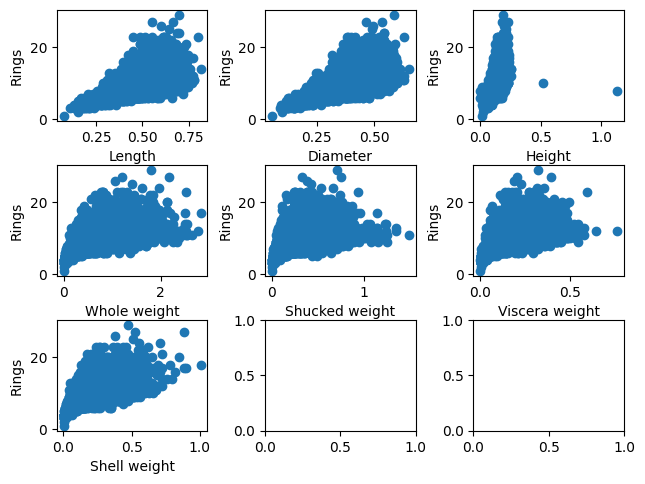

In [7]:
fig, ax = plt.subplots(3, 3)
fig.tight_layout()
explanatory_vars = df.drop(["Sex", "Rings"], axis = 1)
for i, col in enumerate(explanatory_vars.columns):
    ax[i // 3, i % 3].scatter(explanatory_vars[col], df["Rings"])
    ax[i // 3, i % 3].set_xlabel(col)
    ax[i // 3, i % 3].set_ylabel("Rings")
    #plt.scatter(df[col], df["Age"])
    #plt.show()
plt.show()

In [8]:
#df.boxplot("Rings", "Sex")

There is generally a positive correlation between the variables and the Ring number. The correlation seems to be the strongest for Height vs Rings. 

## Data Preprocessing

Sex must be one hot encoded.

In [9]:
cat_list = pd.get_dummies(df["Sex"], prefix = "Sex", dtype = float) 
df = df.join(cat_list)
df = df.drop("Sex", axis = 1)
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.0,1.0,0.0


We are predicting the Rings value, and in order to use the multi-class classification functionality of a neural network as learned in class, we must treat the Rings value as a categorical variable. However, our model may face accuracy issues because if predictions are 6 and 1000 when the true number of Rings is 7, both inaccurate predictions are penalized equally because 6 and 1000 are different categories than 7. However, we want to take into account that 6 is close to 7, and this prediction would have value. Therefore, we will turn the output into classes of groups of 4, so label 0 represents 0-3 Rings, 1 represents 4-7 Rings, 2 represents 8 to 11 rings, and so on. This way, our accuracy is improved while still generating useful predictions. 

In [10]:
#transform y as described above.
df["group"] = df["Rings"] // 4
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M,group
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0.0,0.0,1.0,3
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0.0,0.0,1.0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1.0,0.0,0.0,2
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0.0,0.0,1.0,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0.0,1.0,0.0,1


A min max scaler is applied to each column to standardize measurements.

In [11]:
df = df.drop("Rings", axis = 1)
x = df.iloc[:, df.columns != "group"].values
y = df.iloc[:, df.columns == "group"].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [12]:
from tensorflow.keras.utils import to_categorical
import numpy as np
groups_present = np.unique(y)
num_groups = len(groups_present)
y = to_categorical(y, num_classes = num_groups)

## Training the model

In [13]:
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = Sequential()
model.add(Dense(15, input_dim=10, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(num_groups, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=50, batch_size=64)

Epoch 1/50
53/53 [==============================] - 7s 34ms/step - loss: 1.7624 - accuracy: 0.5391 - val_loss: 1.5190 - val_accuracy: 0.5825
Epoch 2/50
53/53 [==============================] - 0s 9ms/step - loss: 1.3836 - accuracy: 0.5660 - val_loss: 1.2092 - val_accuracy: 0.5825
Epoch 3/50
53/53 [==============================] - 1s 13ms/step - loss: 1.1524 - accuracy: 0.6438 - val_loss: 1.0425 - val_accuracy: 0.6663
Epoch 4/50
53/53 [==============================] - 1s 14ms/step - loss: 1.0346 - accuracy: 0.6630 - val_loss: 0.9547 - val_accuracy: 0.6758
Epoch 5/50
53/53 [==============================] - 1s 14ms/step - loss: 0.9734 - accuracy: 0.6648 - val_loss: 0.9096 - val_accuracy: 0.6770
Epoch 6/50
53/53 [==============================] - 1s 9ms/step - loss: 0.9392 - accuracy: 0.6657 - val_loss: 0.8785 - val_accuracy: 0.6770
Epoch 7/50
53/53 [==============================] - 1s 12ms/step - loss: 0.9151 - accuracy: 0.6699 - val_loss: 0.8582 - val_accuracy: 0.6818
Epoch 8/50
53/5

In this first model, the accuracy peaks around 70% after 50 epochs. A different combination of layers might work better

In [14]:
model2 = Sequential()
model2.add(Dense(15, input_dim=10, activation="relu"))
model2.add(Dense(13, activation="relu"))
model2.add(Dense(11, activation="relu"))
model2.add(Dense(9, activation="relu"))
model2.add(Dense(num_groups, activation="softmax"))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=100, batch_size=256)

Epoch 1/100
14/14 [==============================] - 9s 129ms/step - loss: 2.0082 - accuracy: 0.3349 - val_loss: 1.9406 - val_accuracy: 0.4737
Epoch 2/100
14/14 [==============================] - 0s 17ms/step - loss: 1.8843 - accuracy: 0.5459 - val_loss: 1.8066 - val_accuracy: 0.5825
Epoch 3/100
14/14 [==============================] - 0s 17ms/step - loss: 1.7397 - accuracy: 0.5660 - val_loss: 1.6572 - val_accuracy: 0.5825
Epoch 4/100
14/14 [==============================] - 0s 19ms/step - loss: 1.5872 - accuracy: 0.5660 - val_loss: 1.5121 - val_accuracy: 0.5825
Epoch 5/100
14/14 [==============================] - 1s 52ms/step - loss: 1.4461 - accuracy: 0.5660 - val_loss: 1.3621 - val_accuracy: 0.5825
Epoch 6/100
14/14 [==============================] - 1s 67ms/step - loss: 1.2982 - accuracy: 0.5705 - val_loss: 1.2031 - val_accuracy: 0.6663
Epoch 7/100
14/14 [==============================] - 0s 27ms/step - loss: 1.1472 - accuracy: 0.6609 - val_loss: 1.0645 - val_accuracy: 0.6555
Epoch

In [40]:
model3 = Sequential()
model3.add(Dense(15, input_dim=10, activation="relu"))
model3.add(Dense(256, activation="relu"))
model3.add(Dense(128, activation="relu"))
model3.add(Dense(64, activation="relu"))
model3.add(Dense(num_groups, activation="softmax"))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=50, batch_size=256)

Epoch 1/50
14/14 [==============================] - 2s 27ms/step - loss: 1.7800 - accuracy: 0.5397 - val_loss: 1.3006 - val_accuracy: 0.5825
Epoch 2/50
14/14 [==============================] - 0s 10ms/step - loss: 1.1451 - accuracy: 0.6154 - val_loss: 0.9551 - val_accuracy: 0.6699
Epoch 3/50
14/14 [==============================] - 0s 11ms/step - loss: 0.9348 - accuracy: 0.6603 - val_loss: 0.8525 - val_accuracy: 0.6782
Epoch 4/50
14/14 [==============================] - 0s 12ms/step - loss: 0.8817 - accuracy: 0.6779 - val_loss: 0.8226 - val_accuracy: 0.6926
Epoch 5/50
14/14 [==============================] - 0s 12ms/step - loss: 0.8431 - accuracy: 0.6872 - val_loss: 0.8009 - val_accuracy: 0.6986
Epoch 6/50
14/14 [==============================] - 0s 10ms/step - loss: 0.8156 - accuracy: 0.6926 - val_loss: 0.7865 - val_accuracy: 0.6914
Epoch 7/50
14/14 [==============================] - 0s 12ms/step - loss: 0.7994 - accuracy: 0.6890 - val_loss: 0.7855 - val_accuracy: 0.7010
Epoch 8/50
14

## Analyzing the results

In [15]:
num_groups

8

The accuracy has not improved. 70% accuracy is still good, because since there are 8 possible groups, picking at random would result in a 12.5% accuracy, so 70% accuracy means the model is giving meaningful predictions. 

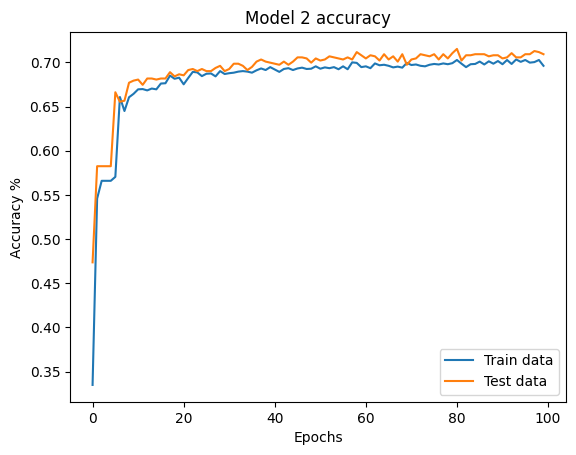

In [16]:
plt.plot(history2.history["accuracy"])
plt.plot(history2.history["val_accuracy"])
plt.title("Model 2 accuracy")
plt.ylabel('Accuracy %')
plt.xlabel('Epochs')
plt.legend(['Train data', 'Test data'], loc='lower right')
plt.show()

The accuracy of this model goes seems to plateau at around 70%, which is significantly better than random guessing. The train and test accuracy moved together, so that means it did not overfit.

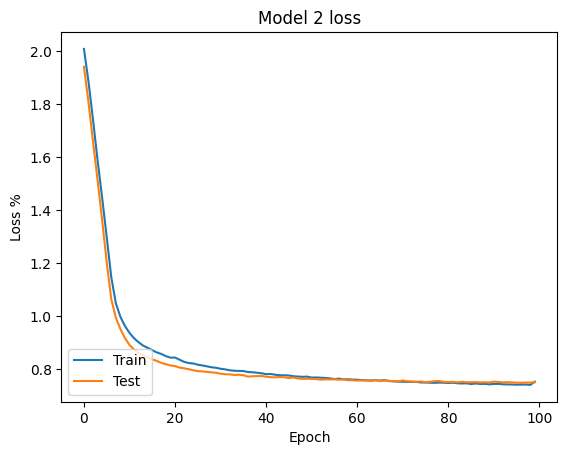

In [17]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model 2 loss')
plt.ylabel('Loss %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower left')
plt.show()

The loss of the model is decreasing, which means that the error of the model is decreaasing, which is good. The train and test loss also are similar which measn the model did not overfit.

The below cell demonstrates the model predicting a high percentage of accurate Ring value groups.

In [28]:
predictions_raw = model2.predict(x)
predictions = [np.argmax(probs_arr) for probs_arr in predictions_raw]
df["predicted group"] = predictions
df.head()


131/131 [==============================] - 1s 6ms/step


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M,group,predicted group
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0.0,0.0,1.0,3,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0.0,0.0,1.0,1,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1.0,0.0,0.0,2,2
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.0,0.0,1.0,2,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.0,1.0,0.0,1,1
